<a href="https://colab.research.google.com/github/owilli38/DSBA-6156/blob/main/Owen_Williamson%2C_DSBA6156_Project_1_Classification_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##**DSBA 6156: Applied Machine Learning**

Project 1: Classification Models for
Optimizing Default Prediction Models

Owen Williamson

Due: February 18th

In [1]:
#Importing Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Import Dataset
dfOW = pd.read_csv('kaggle_dataset.csv')

##**EDA - Exploratory Data Analysis**

In [3]:
dfOW.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38985 entries, 0 to 38984
Data columns (total 87 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   feature_1   38985 non-null  float64
 1   feature_2   38985 non-null  int64  
 2   feature_3   38985 non-null  int64  
 3   feature_4   38985 non-null  int64  
 4   feature_5   36771 non-null  float64
 5   feature_6   36771 non-null  float64
 6   feature_7   36771 non-null  float64
 7   feature_8   38985 non-null  int64  
 8   feature_9   38985 non-null  int64  
 9   feature_10  36771 non-null  float64
 10  feature_11  38985 non-null  float64
 11  feature_12  38985 non-null  float64
 12  feature_13  36771 non-null  float64
 13  feature_14  36771 non-null  float64
 14  feature_15  23258 non-null  float64
 15  feature_16  26095 non-null  float64
 16  feature_17  28240 non-null  float64
 17  feature_18  23258 non-null  float64
 18  feature_19  26095 non-null  float64
 19  feature_20  28240 non-nul

In [4]:
dfOW.head()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,ID,target
0,15000.00,62,1,0,2240.50,70.0000,104.2857,45,52,1.2155,...,0,0,0,2,1,False,60,1,4b40dd0dd9d20f49,0
1,50024.53,61,1,0,496.72,1522.0000,439.1429,1,1,0.0266,...,3,0,0,0,1,False,80,5,c7bbe911fe698fd0,0
2,32770.00,34,0,1,1489.81,186.4286,0.0000,11,11,0.7938,...,2,2,0,1,1,False,90,7,6d9eafd42fe25cce,0
3,82003.32,33,1,0,NaN,NaN,NaN,0,0,NaN,...,5,2,0,1,1,False,80,9,b7d3493315b18413,0
4,11057.77,68,1,0,261.20,7.8571,32.2857,17,22,0.5889,...,3,2,0,1,1,False,85,6,ea64144ab2a596a3,0


In [5]:
dfOW.describe()

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_76,feature_77,feature_78,feature_79,feature_80,feature_81,feature_82,feature_84,feature_85,target
count,3.898500e+04,38985.000000,38985.000000,38985.000000,36771.000000,36771.000000,36771.000000,38985.000000,38985.000000,36771.000000,...,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000,38985.000000
mean,3.484706e+04,45.646197,0.482801,0.524484,600.987651,238.338737,206.265718,6.850045,10.143517,0.592114,...,0.405412,3.510248,2.560882,1.191946,0.070976,1.391535,0.990047,74.948185,4.483545,0.028934
std,3.406895e+04,13.399512,0.499711,0.514086,572.164116,335.988411,392.821775,7.269573,18.639226,1.608102,...,0.692286,1.350853,2.103188,1.631621,0.277805,0.598445,0.099266,12.203381,2.889420,0.167624
min,3.000000e+03,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.020100,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000
25%,1.530924e+04,35.000000,0.000000,0.000000,261.210000,28.428600,0.000000,2.000000,3.000000,0.175800,...,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000,65.000000,2.000000,0.000000
50%,2.500000e+04,45.000000,0.000000,1.000000,392.000000,108.571400,0.000000,5.000000,6.000000,0.352700,...,0.000000,4.000000,3.000000,0.000000,0.000000,1.000000,1.000000,80.000000,5.000000,0.000000
75%,4.311684e+04,56.000000,1.000000,1.000000,755.500000,269.142900,226.142900,9.000000,12.000000,0.659050,...,1.000000,5.000000,5.000000,2.000000,0.000000,2.000000,1.000000,85.000000,7.000000,0.000000
max,2.081718e+06,76.000000,1.000000,3.000000,4458.310000,2239.428600,2378.714300,186.000000,953.000000,119.868600,...,5.000000,5.000000,5.000000,5.000000,3.000000,2.000000,1.000000,100.000000,9.000000,1.000000


In [6]:
dfOW.isna().sum()

,0
feature_1,0
feature_2,0
feature_3,0
feature_4,0
feature_5,2214
...,...
feature_83,0
feature_84,0
feature_85,0
ID,0


In [7]:
print("Number NaN each feature")
for feature in dfOW.columns:
    print(f"{feature}: {dfOW[feature].isna().sum()}")
print(f"Total NaN: {dfOW.isna().sum().sum()}")

Number NaN each feature
feature_1: 0
feature_2: 0
feature_3: 0
feature_4: 0
feature_5: 2214
feature_6: 2214
feature_7: 2214
feature_8: 0
feature_9: 0
feature_10: 2214
feature_11: 0
feature_12: 0
feature_13: 2214
feature_14: 2214
feature_15: 15727
feature_16: 12890
feature_17: 10745
feature_18: 15727
feature_19: 12890
feature_20: 10745
feature_21: 15727
feature_22: 12890
feature_23: 10745
feature_24: 0
feature_25: 0
feature_26: 0
feature_27: 0
feature_28: 0
feature_29: 0
feature_30: 0
feature_31: 0
feature_32: 0
feature_33: 0
feature_34: 0
feature_35: 0
feature_36: 20105
feature_37: 22246
feature_38: 23572
feature_39: 14301
feature_40: 14301
feature_41: 14301
feature_42: 14301
feature_43: 14301
feature_44: 14301
feature_45: 14301
feature_46: 14301
feature_47: 14301
feature_48: 14301
feature_49: 14301
feature_50: 30487
feature_51: 14301
feature_52: 14301
feature_53: 14301
feature_54: 14301
feature_55: 14301
feature_56: 18544
feature_57: 0
feature_58: 0
feature_59: 0
feature_60: 0
feature

Text(0.5, 1.0, 'Missing Values Heatmap')

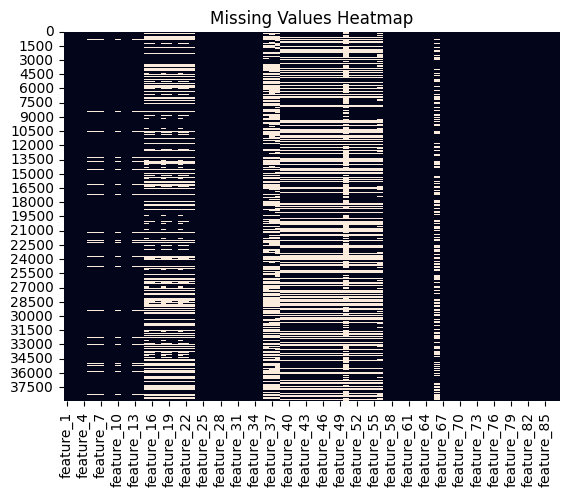

In [8]:
sns.heatmap(dfOW.isna(), cbar=False); plt.title('Missing Values Heatmap')

In [9]:
dfOW[dfOW['target']==1]

,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_78,feature_79,feature_80,feature_81,feature_82,feature_83,feature_84,feature_85,ID,target
150,34483.10,27,0,1,449.53,111.2857,0.0000,5,5,0.5775,...,0,0,0,1,1,False,65,2,049ef63fce2b829b,1
861,5793.66,41,0,1,292.76,10.4286,0.0000,60,60,2.7181,...,5,4,0,1,1,False,90,9,ffa9025365017f27,1
1383,21469.49,28,0,1,447.41,27.0000,0.0000,19,20,2.4654,...,0,0,0,2,1,True,50,0,8549c1497a14c840,1
2052,22726.17,28,0,1,395.73,69.2857,0.0000,3,3,0.4796,...,0,0,0,2,1,False,50,0,23e98981372ad005,1
2292,10210.21,40,0,1,650.67,463.1429,0.0000,7,9,0.3731,...,5,3,0,1,1,False,85,9,6baed46c1c816b78,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35400,9325.52,23,1,0,665.41,155.7143,79.1429,3,3,0.5442,...,0,0,0,2,1,True,60,0,840614e6b9d7af03,1
36656,14662.50,38,1,0,78.87,9.1429,866.1429,9,10,0.5240,...,5,4,0,1,1,False,90,7,15f6b66d50fa9156,1
36871,9162.38,46,1,0,880.14,456.4286,26.1429,3,4,0.2231,...,5,1,0,1,1,False,80,8,a0b84707d2442399,1
37378,22546.70,39,0,1,369.70,160.2857,0.0000,4,4,0.2689,...,2,0,0,2,1,False,80,4,a7f08fdaf95f4415,1


Text(0, 0.5, 'Relative Frequency')

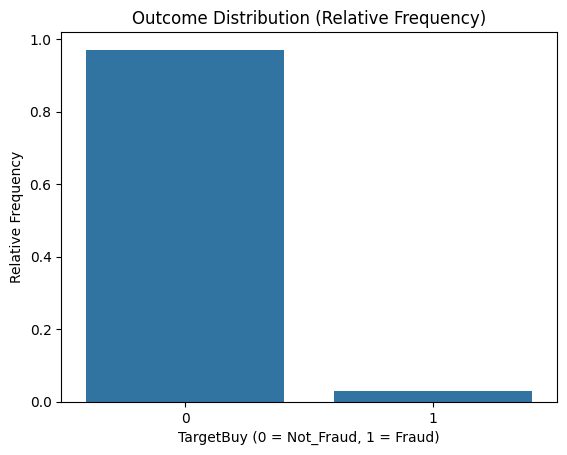

In [10]:
# Plot Distribution of Target Variable (Fraud or Not Fraud)
outcome_counts = dfOW['target'].value_counts(normalize=True)
sns.barplot(x=outcome_counts.index, y=outcome_counts.values)
plt.title("Outcome Distribution (Relative Frequency)")
plt.xlabel("TargetBuy (0 = Not_Fraud, 1 = Fraud)")
plt.ylabel("Relative Frequency")

<Axes: xlabel='target', ylabel='count'>

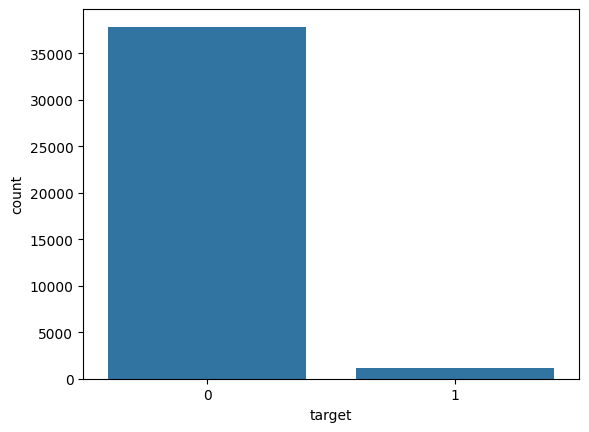

In [11]:
sns.countplot(x="target", data=dfOW)

In [12]:
dfOW.shape

(38985, 87)

##**Split Data into Test/Train/Validation Sets**

In [13]:
# Split into Train, Test & Validation Data Sets
from sklearn.model_selection import train_test_split



TIMEOUT_FAST = 600
TIMEOUT_FULL = 1800
CPU_LIMIT = 4

# Ensure X and y are correctly set from the main DataFrame to avoid sample size inconsistency
X = dfOW.drop(columns=['target', 'ID'])
y = dfOW['target']

X_temp, X_test, y_temp, y_test = train_test_split(
    X,
    y,
    test_size=.15, # 15% of data for test
    stratify=y, # keeps distribution of target similar between splits
    random_state=42
)

val_relative_size = 0.15 / (1 - 0.15)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp,
    y_temp,
    test_size=val_relative_size, # 15% for validation set
    stratify=y_temp,
    random_state=42
)

In [14]:
train_data = X_train.copy()
train_data['target'] = y_train

val_data = X_val.copy()
val_data['target'] = y_val

test_data = X_test.copy()
test_data['target'] = y_test

In [15]:
train_data.shape, val_data.shape, test_data.shape

((27289, 86), (5848, 86), (5848, 86))

In [16]:
!pip install xgboost

In [17]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# The Imputer will 'fit' (calculate mean) on X_train
# and 'transform' (apply that mean) to X_val and X_test
imputer_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('model', XGBClassifier(scale_pos_weight=32))
])

# When you call .fit, it only uses the training data for calculations
imputer_pipeline.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('model',
                 XGBClassifier(base_score=None, booster=None, callbacks=None,
                               colsample_bylevel=None, colsample_bynode=None,
                               colsample_bytree=None, device=None,
                               early_stopping_rounds=None,
                               enable_categorical=False, eval_metric=None,
                               feature_types=None, feature_weights=None,
                               gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, ...))])

In [18]:
target = dfOW.target
target.value_counts(normalize=True)

,proportion
target,
0,0.971066
1,0.028934


In [19]:
y_train.value_counts(normalize=True)

,proportion
target,
0,0.971051
1,0.028949


In [20]:
y_val.value_counts(normalize=True)

,proportion
target,
0,0.971101
1,0.028899


In [21]:
y_test.value_counts(normalize=True)

,proportion
target,
0,0.971101
1,0.028899


Confirm that the splits have equal distribution between train, validation, and test split

##**Feature Selection**




In [22]:
train_data = X_train.copy()
train_data['target'] = y_train

val_data = X_val.copy()
val_data['target'] = y_val

test_data = X_test.copy()
test_data['target'] = y_test

In [23]:
import pandas as pd

def apply_imputation_and_flags(X_train, X_val, X_test):
    # Work on copies to avoid SettingWithCopy warnings if they are slices
    X_train, X_val, X_test = X_train.copy(), X_val.copy(), X_test.copy()

    # 1. Determine which columns have NaNs in the training set
    cols_with_missing = [col for col in X_train.columns if X_train[col].isnull().any()]

    # 2. Add flags to all sets based on the Training Set discovery
    for col in cols_with_missing:
        flag_name = f"{col}_was_nan"
        X_train[flag_name] = X_train[col].isnull().astype(int)
        X_val[flag_name] = X_val[col].isnull().astype(int)
        X_test[flag_name] = X_test[col].isnull().astype(int)

    # 3. Fill the actual NaNs with 0
    X_train = X_train.fillna(0)
    X_val = X_val.fillna(0)
    X_test = X_test.fillna(0)

    return X_train, X_val, X_test

# Apply to your datasets
X_train, X_val, X_test = apply_imputation_and_flags(X_train, X_val, X_test)

In [24]:
# 1. Calculate Correlation on Training Set ONLY
corr_matrix = X_train.corr().abs()

# 2. Identify redundant features
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > 0.90)]

# 3. Drop from ALL three datasets
X_train = X_train.drop(columns=to_drop)
X_val = X_val.drop(columns=to_drop)
X_test = X_test.drop(columns=to_drop)

print(f"Dropped {len(to_drop)} features: {to_drop}")

Dropped 43 features: ['feature_4', 'feature_14', 'feature_18', 'feature_19', 'feature_20', 'feature_21', 'feature_22', 'feature_23', 'feature_26', 'feature_31', 'feature_32', 'feature_34', 'feature_35', 'feature_84', 'feature_85', 'feature_6_was_nan', 'feature_7_was_nan', 'feature_10_was_nan', 'feature_13_was_nan', 'feature_14_was_nan', 'feature_18_was_nan', 'feature_19_was_nan', 'feature_20_was_nan', 'feature_21_was_nan', 'feature_22_was_nan', 'feature_23_was_nan', 'feature_36_was_nan', 'feature_40_was_nan', 'feature_41_was_nan', 'feature_42_was_nan', 'feature_43_was_nan', 'feature_44_was_nan', 'feature_45_was_nan', 'feature_46_was_nan', 'feature_47_was_nan', 'feature_48_was_nan', 'feature_49_was_nan', 'feature_50_was_nan', 'feature_51_was_nan', 'feature_52_was_nan', 'feature_53_was_nan', 'feature_54_was_nan', 'feature_55_was_nan']


### Feature Selection on Training Data
Now we will apply feature selection methods using *only* the training data to avoid data leakage.

In [25]:
from sklearn.feature_selection import SelectKBest, f_classif, SelectFromModel
from sklearn.ensemble import RandomForestClassifier

# Univariate Selection (SelectKBest)
# Select top 15 features based on ANOVA F-value using X_train and y_train
selector_uni = SelectKBest(score_func=f_classif, k=15)
selector_uni.fit(X_train, y_train)

# Model-Based Selection (Embedded)
# Using a Random Forest to pick features that actually contribute to prediction
# Fit on X_train and y_train
selector_model = SelectFromModel(RandomForestClassifier(n_estimators=100, random_state=42))
selector_model.fit(X_train, y_train)

# Get the names of the selected features from both methods
selected_features_kbest = X_train.columns[selector_uni.get_support()]
selected_features_model = X_train.columns[selector_model.get_support()]

print(f"Features selected by SelectKBest: {list(selected_features_kbest)}")
print(f"Features selected by Model-Based method: {list(selected_features_model)}")

# Combine and get unique features from both selections
final_selected_features = list(set(selected_features_kbest.tolist() + selected_features_model.tolist()))
print(f"Final combined selected features: {final_selected_features}")

# Update X_train, X_val, X_test to only include these selected features
X_train = X_train[final_selected_features]
X_val = X_val[final_selected_features]
X_test = X_test[final_selected_features]

print(f"New shape of X_train: {X_train.shape}")
print(f"New shape of X_val: {X_val.shape}")
print(f"New shape of X_test: {X_test.shape}")

/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [45 53 54 55 56] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


Features selected by SelectKBest: ['feature_2', 'feature_6', 'feature_7', 'feature_8', 'feature_10', 'feature_28', 'feature_66', 'feature_71', 'feature_72', 'feature_74', 'feature_81', 'feature_17_was_nan', 'feature_37_was_nan', 'feature_38_was_nan', 'feature_39_was_nan']
Features selected by Model-Based method: ['feature_1', 'feature_2', 'feature_5', 'feature_6', 'feature_7', 'feature_8', 'feature_9', 'feature_10', 'feature_11', 'feature_12', 'feature_13', 'feature_15', 'feature_16', 'feature_17', 'feature_25', 'feature_27', 'feature_29', 'feature_33', 'feature_36', 'feature_37', 'feature_38', 'feature_51', 'feature_52', 'feature_56', 'feature_57', 'feature_66', 'feature_77', 'feature_78']
Final combined selected features: ['feature_1', 'feature_15', 'feature_7', 'feature_25', 'feature_17', 'feature_36', 'feature_16', 'feature_10', 'feature_81', 'feature_8', 'feature_5', 'feature_9', 'feature_11', 'feature_33', 'feature_27', 'feature_17_was_nan', 'feature_6', 'feature_51', 'feature_71

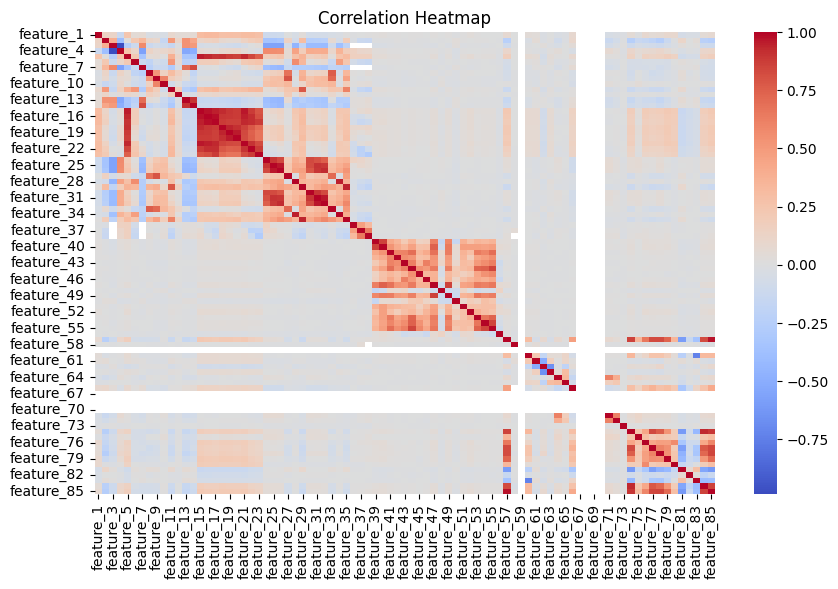

In [26]:
# Correlation Analysis
plt.figure(figsize=(10, 6))
sns.heatmap(X.corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##**Training Models -- Mulitple Classification Models**

##**Training Models -- Mulitple Classification Models**

**Logistic Regression**


In [27]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Initialize the scaler
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [28]:
# Initialize and train the model
log_reg = LogisticRegression(max_iter=5000, class_weight = 'balanced', C= 1.0, penalty='l1',
    solver='liblinear', random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Predict on the Validation set
y_val_pred = log_reg.predict(X_val_scaled)
y_val_proba = log_reg.predict_proba(X_val_scaled)[:, 1] # Probabilities for ROC curve

# 3. Quick Evaluation
print(f"Validation Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")
print(f"Validation ROC-AUC: {roc_auc_score(y_val, y_val_proba):.4f}")

Validation Accuracy: 0.6322
Validation ROC-AUC: 0.6604


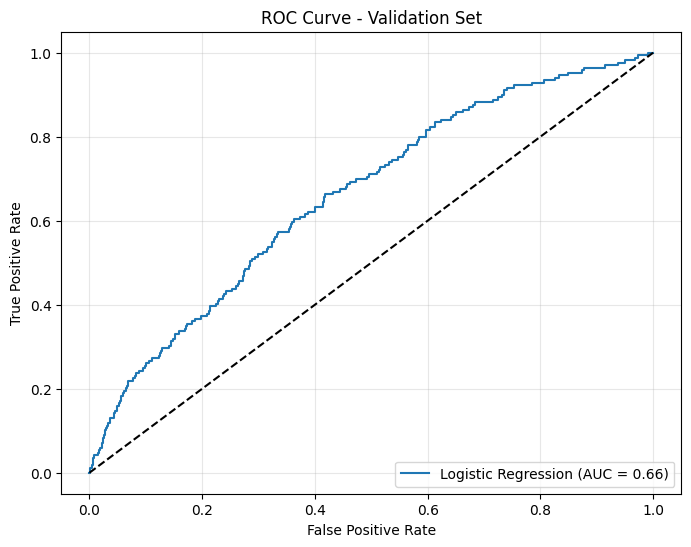

In [29]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'Logistic Regression (AUC = {roc_auc_score(y_val, y_val_proba):.2f})')
plt.plot([0, 1], [0, 1], 'k--') # Diagonal dashed line shows the chance by guessing the class
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Validation Set')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

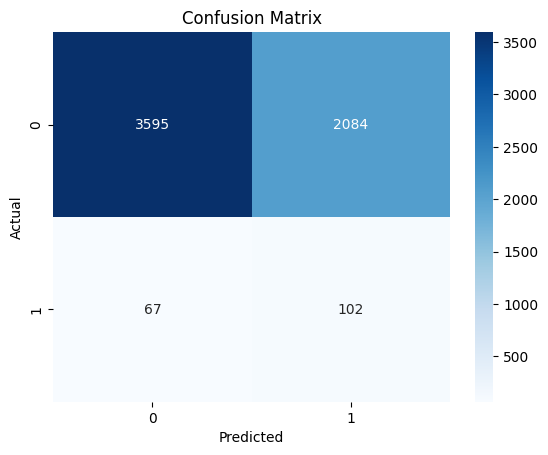

In [30]:
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

This confusion matrix shows that the LR model hasn't done great predicting either the majority (0) class or the minority (1) class for fraud.

/tmp/ipython-input-974040650.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')


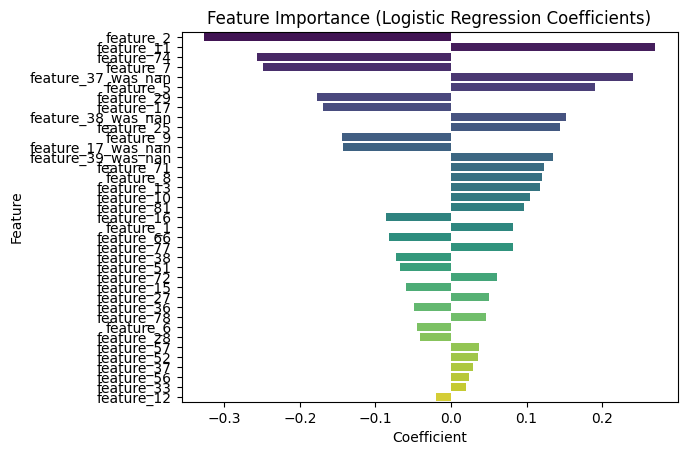

In [31]:
feature_importance = pd.DataFrame({
    'Feature': X_train.columns ,
    'Coefficient': log_reg.coef_[0]
}).sort_values(by='Coefficient', key=abs, ascending=False)

sns.barplot(data=feature_importance, x='Coefficient', y='Feature', palette='viridis')
plt.title("Feature Importance (Logistic Regression Coefficients)")
plt.show()

In [32]:
print("Coefficients:", log_reg.coef_)
print("Intercept:", log_reg.intercept_)

Coefficients: [[ 0.08209096 -0.05978223 -0.24828411  0.14484147 -0.16988418 -0.04920303
  -0.08603929  0.10391288  0.0969002   0.11981126  0.19000511 -0.14407853
   0.26981227  0.01997098  0.0499342  -0.14265708 -0.04482365 -0.0671493
   0.12273243  0.13532598  0.15149284  0.03734217  0.1172647  -0.08201298
  -0.0732315   0.24059775 -0.17776805 -0.04087885  0.08192853  0.02927061
   0.02435024  0.04610792 -0.01993818  0.0357241  -0.32659273  0.06072522
  -0.25609856]]
Intercept: [-0.18716589]


**Random Forest**

In [33]:
#Import Package
from sklearn.ensemble import RandomForestClassifier

RF_Model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)

In [34]:
RF_Model.fit(X_train_scaled, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

In [35]:
RF_Model.score(X_val_scaled, y_val)

0.9711012311901505

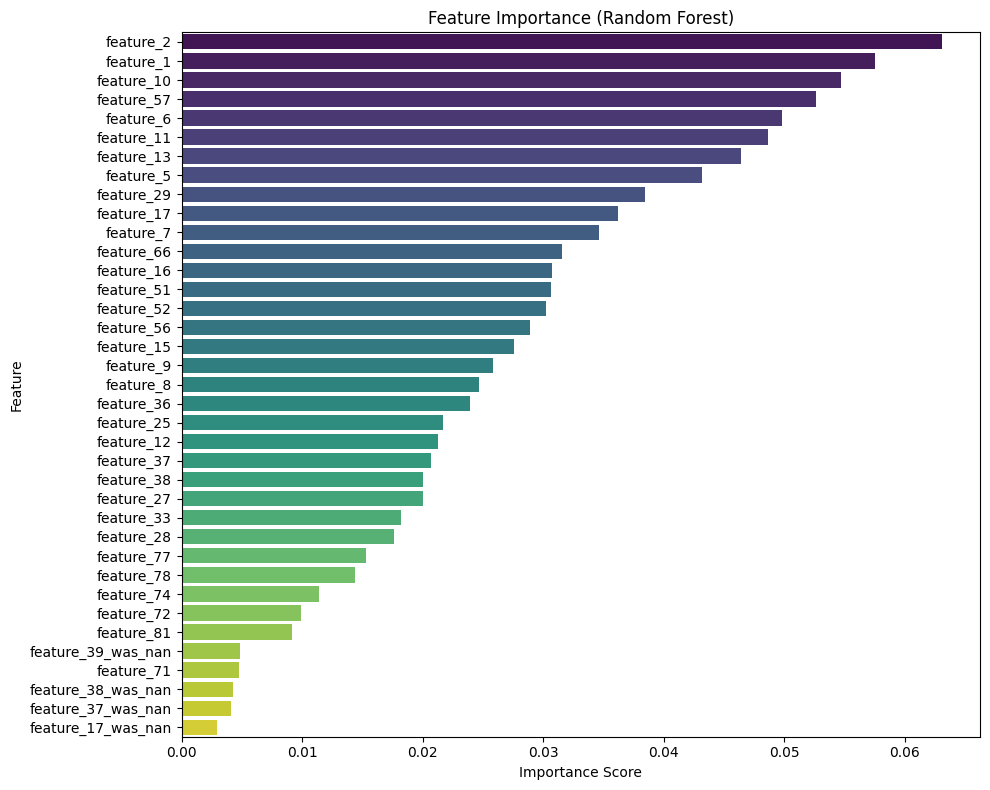

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances from the trained model
importances = RF_Model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame for better visualization and sorting
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plotting the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df, palette='viridis', hue='Feature', legend=False)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()

In [37]:
y_val_pred = RF_Model.predict(X_val_scaled)

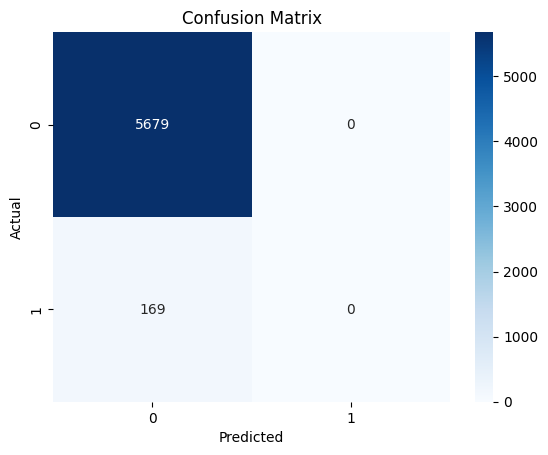

In [38]:
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

Without hyperparameters, random forest has misclassed the minority class.


**XGBoost**

In [39]:
# Import Packages
from xgboost import XGBClassifier
from sklearn.datasets import make_hastie_10_2



# Calculate the ratio
ratio = 5679 / 169

xgb = XGBClassifier(
    max_depth=5,
    learning_rate=0.01,
    n_estimators=500,        # Increased to give it time to learn the rare class
    scale_pos_weight=ratio,   # <--- The critical fix
    use_label_encoder=False,
    eval_metric='logloss'
)

xgb.fit(X_train_scaled, y_train)

# Re-evaluate
y_val_pred = xgb.predict(X_val_scaled)
xgb.score(X_val_scaled, y_val)

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [18:08:33] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


0.7670998632010944

In [40]:
y_val_pred = xgb.predict(X_val_scaled)

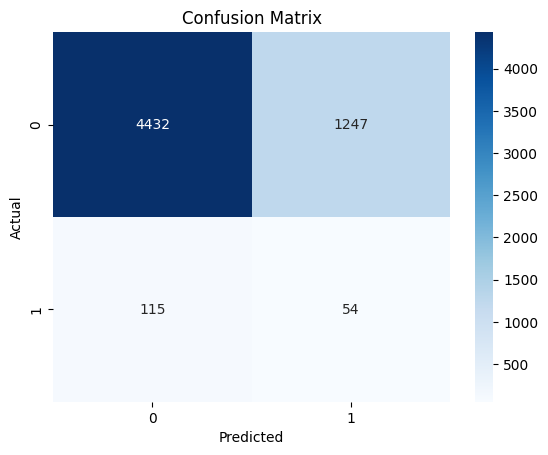

In [41]:
conf_matrix = confusion_matrix(y_val, y_val_pred)
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [42]:
import numpy as np
from sklearn.metrics import f1_score

# Get predicted probabilities for the positive class from the XGBoost model
y_probs = xgb.predict_proba(X_val_scaled)[:, 1]

thresholds = np.arange(0.1, 0.9, 0.05)
f1_scores = [f1_score(y_val, (y_probs > t).astype(int)) for t in thresholds]

# Find the threshold that maximized F1
best_threshold = thresholds[np.argmax(f1_scores)]
print(f"Best Threshold for F1-Score: {best_threshold:.2f}")

Best Threshold for F1-Score: 0.60


##**Hyper-Parameter Optimization**

In [43]:
# Assuming you just ran a fit with the scale_pos_weight fix
import pandas as pd

# Get feature importances
importances = xgb.feature_importances_
feature_names = X_train.columns

# Create a clean DataFrame
feature_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feature_imp_df = feature_imp_df.sort_values(by='Importance', ascending=False)

# Identify features to keep (e.g., those contributing to 95% of total importance)
# Or simply take the Top 20 or 25
top_features = feature_imp_df.head(25)['Feature'].values
X_train_final = X_train[top_features]
X_val_final = X_val[top_features]
X_test_final = X_test[top_features]

In [44]:
# Get a dictionary of feature names and their importance scores
importance_dict = xgb.get_booster().get_score(importance_type='weight')

# Sort them so the most important are at the top
sorted_importance = sorted(importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, score in sorted_importance:
    print(f"Feature: {feature:25} | Score: {score}")

Feature: f0                        | Score: 905.0
Feature: f34                       | Score: 730.0
Feature: f21                       | Score: 617.0
Feature: f2                        | Score: 521.0
Feature: f16                       | Score: 498.0
Feature: f30                       | Score: 492.0
Feature: f7                        | Score: 446.0
Feature: f22                       | Score: 446.0
Feature: f12                       | Score: 422.0
Feature: f17                       | Score: 421.0
Feature: f5                        | Score: 409.0
Feature: f23                       | Score: 400.0
Feature: f33                       | Score: 400.0
Feature: f4                        | Score: 346.0
Feature: f10                       | Score: 344.0
Feature: f27                       | Score: 263.0
Feature: f26                       | Score: 254.0
Feature: f11                       | Score: 229.0
Feature: f1                        | Score: 220.0
Feature: f9                        | Score: 208.0


In [45]:

# Convert scaled NumPy arrays back to DataFrames, using the current column names from X_train
current_columns = X_train.columns
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=current_columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=current_columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=current_columns)

# Now apply the feature selection using top_features (assuming top_25_features refers to this variable)
X_train_reduced = X_train_scaled_df[top_features]
X_val_reduced = X_val_scaled_df[top_features]
X_test_reduced = X_test_scaled_df[top_features]

**Logistic Regression Optimization**

In [46]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(max_iter=5000, solver='saga')) ])

grid_search = GridSearchCV(
    estimator=LogisticRegression(max_iter=5000, class_weight = 'balanced', random_state=42),
    param_grid={
        'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
        'penalty': ['l1', 'l2'],
        'solver': ['liblinear', 'saga'],
        'class_weight': ['balanced', {0: 1, 1: 50}, {0: 1, 1: 100}]

    },
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

In [47]:
# Fit the GridSearchCV to the scaled training data
grid_search.fit(X_train_reduced, y_train)

# Display the best parameters and best score
print("Best Parameters found by GridSearchCV:", grid_search.best_params_)
print("Best ROC-AUC score on validation sets:", grid_search.best_score_)

Best Parameters found by GridSearchCV: {'C': 0.01, 'class_weight': {0: 1, 1: 100}, 'penalty': 'l2', 'solver': 'saga'}
Best ROC-AUC score on validation sets: 0.6569168009537873


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# 1. Create a Pipeline: Scaling THEN Logistic Regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('logreg', LogisticRegression(solver='liblinear', max_iter=5000))
])

# 2. Define parameters to search (note the 'logreg__' prefix)
param_grid = {
    'logreg__C': [0.01, 0.1, 1, 10],
    'logreg__penalty': ['l1'],
    'logreg__class_weight': ['balanced', None]
}

# 3. Fit on your reduced training set
grid_search = GridSearchCV(pipeline, param_grid, scoring='roc_auc', cv=3)
grid_search.fit(X_train_reduced, y_train)

# 4. Predict using the BEST estimator (it handles scaling automatically!)
best_model = grid_search.best_estimator_
y_val_pred = best_model.predict(X_val_reduced)

print(f"Accuracy: {accuracy_score(y_val, y_val_pred):.4f}")

Accuracy: 0.6276


In [49]:
# Get the best estimator
best_model = grid_search.best_estimator_.named_steps['logreg']

# Count how many coefficients are non-zero
import numpy as np
total_features = len(best_model.coef_[0])
active_features = np.count_nonzero(best_model.coef_)

print(f"Total features: {total_features}")
print(f"Features kept by L1: {active_features}")
print(f"Features dropped: {total_features - active_features}")

Total features: 25
Features kept by L1: 25
Features dropped: 0


In [50]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Retrieve the best estimator
best_log_reg_model = grid_search.best_estimator_

# 2. Make predictions on the validation set
y_val_pred_optimized = best_log_reg_model.predict(X_val_reduced)

# 3. Predict probabilities for the positive class
y_val_proba_optimized = best_log_reg_model.predict_proba(X_val_reduced)[:, 1]

# 4. Calculate Accuracy
accuracy_optimized = accuracy_score(y_val, y_val_pred_optimized)

# 5. Calculate ROC AUC
roc_auc_optimized = roc_auc_score(y_val, y_val_proba_optimized)

# 6. Compute FPR and TPR for the ROC curve
fpr_optimized, tpr_optimized, _ = roc_curve(y_val, y_val_proba_optimized)

# 7. Calculate the KS Statistic
ks_statistic_optimized = np.max(np.abs(tpr_optimized - fpr_optimized))

# 8. Print the calculated metrics
print(f"Optimized Logistic Regression Validation Accuracy: {accuracy_optimized:.4f}")
print(f"Optimized Logistic Regression Validation ROC-AUC: {roc_auc_optimized:.4f}")
print(f"Optimized Logistic Regression Validation KS Statistic: {ks_statistic_optimized:.4f}")

Optimized Logistic Regression Validation Accuracy: 0.6276
Optimized Logistic Regression Validation ROC-AUC: 0.6490
Optimized Logistic Regression Validation KS Statistic: 0.2323


**RF Model Optimization**

In [51]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# 1. Define the parameter grid for RandomForestClassifier
param_grid_rf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, None],
    'min_samples_leaf': [2, 5, 10],
    'max_features': ['sqrt', 'log2']
}

# 2. Initialize GridSearchCV for Random Forest
grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced_subsample', random_state=42),
    param_grid=param_grid_rf,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1,
    verbose=1 # Added to track progress
)

print("GridSearchCV for Random Forest initialized.")


GridSearchCV for Random Forest initialized.


In [52]:
grid_search_rf.fit(X_train_reduced, y_train)
print("GridSearchCV for Random Forest fitting completed.")

Fitting 5 folds for each of 54 candidates, totalling 270 fits
GridSearchCV for Random Forest fitting completed.


In [53]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Print the best parameters found by GridSearchCV for Random Forest
print("Best Parameters found by GridSearchCV for Random Forest:", grid_search_rf.best_params_)

# 2. Retrieve the best estimator
best_rf_model = grid_search_rf.best_estimator_

# 3. Make predictions and predict probabilities on the scaled validation set
y_val_pred_rf_optimized = best_rf_model.predict(X_val_reduced)
y_val_proba_rf_optimized = best_rf_model.predict_proba(X_val_reduced)[:, 1]

# 4. Calculate Accuracy, ROC AUC, and KS Statistic
accuracy_rf_optimized = accuracy_score(y_val, y_val_pred_rf_optimized)
roc_auc_rf_optimized = roc_auc_score(y_val, y_val_proba_rf_optimized)
fpr_rf_optimized, tpr_rf_optimized, _ = roc_curve(y_val, y_val_proba_rf_optimized)
ks_statistic_rf_optimized = np.max(np.abs(tpr_rf_optimized - fpr_rf_optimized))

# 5. Print the calculated metrics
print(f"Optimized Random Forest Validation Accuracy: {accuracy_rf_optimized:.4f}")
print(f"Optimized Random Forest Validation ROC-AUC: {roc_auc_rf_optimized:.4f}")
print(f"Optimized Random Forest Validation KS Statistic: {ks_statistic_rf_optimized:.4f}")

Best Parameters found by GridSearchCV for Random Forest: {'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 10, 'n_estimators': 200}
Optimized Random Forest Validation Accuracy: 0.7358
Optimized Random Forest Validation ROC-AUC: 0.6402
Optimized Random Forest Validation KS Statistic: 0.2274


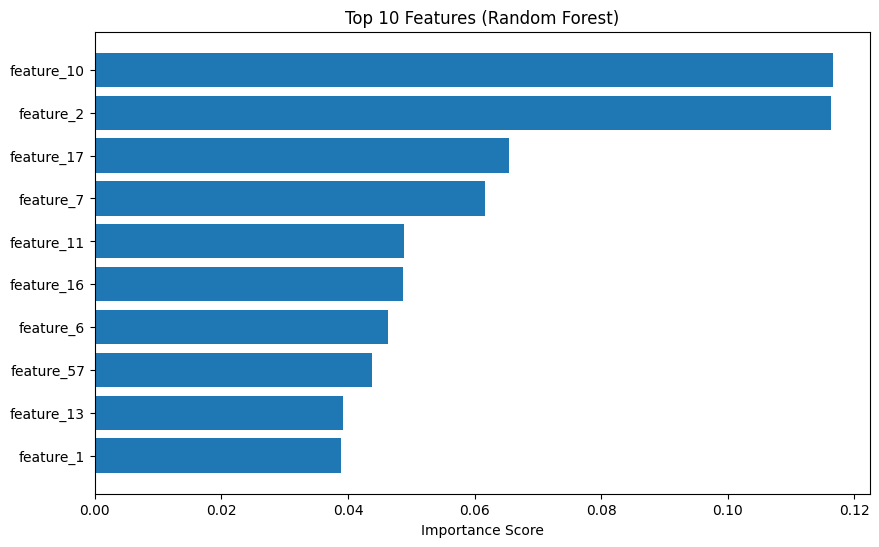

In [54]:
import pandas as pd
import matplotlib.pyplot as plt

# Get importances from the best RF model
importances = grid_search_rf.best_estimator_.feature_importances_
feature_names = X_train_reduced.columns

rf_importance = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
rf_importance = rf_importance.sort_values(by='Importance', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(rf_importance['Feature'][:10], rf_importance['Importance'][:10])
plt.xlabel('Importance Score')
plt.title('Top 10 Features (Random Forest)')
plt.gca().invert_yaxis()
plt.show()

**XGBoost Optimization**

In [55]:
!pip install xgboost

In [56]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# 1. Define the parameter grid
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3,4,5],
    'max_iter': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'scale_pos_weight': [32],
    'subsample': [0.8],
    'colsample_bytree': [0.8]
}

# 2. Initialize GridSearchCV
grid_search_xgb = GridSearchCV(
    estimator=XGBClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid_xgb,
    cv=5,
    scoring='roc_auc',
    n_jobs=-1
)

print("GridSearchCV for XGBoost initialized.")

GridSearchCV for XGBoost initialized.


In [57]:
grid_search_xgb.fit(X_train_reduced, y_train)
print("GridSearchCV for XGBoost (HistGradientBoostingClassifier) fitting completed.")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [18:10:11] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "class_weight", "max_iter" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV for XGBoost (HistGradientBoostingClassifier) fitting completed.


In [58]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Print the best parameters found by GridSearchCV for HistGradientBoostingClassifier
print("Best Parameters found by GridSearchCV for XGBoost:", grid_search_xgb.best_params_)

# 2. Retrieve the best estimator
best_xgb_model = grid_search_xgb.best_estimator_

# 3. Make predictions and predict probabilities on the scaled validation set
y_val_pred_xgb_optimized = best_xgb_model.predict(X_val_reduced)
y_val_proba_xgb_optimized = best_xgb_model.predict_proba(X_val_reduced)[:, 1]

# 4. Calculate Accuracy, ROC AUC, and KS Statistic
accuracy_xgb_optimized = accuracy_score(y_val, y_val_pred_xgb_optimized)
roc_auc_xgb_optimized = roc_auc_score(y_val, y_val_proba_xgb_optimized)
fpr_xgb_optimized, tpr_xgb_optimized, _ = roc_curve(y_val, y_val_proba_xgb_optimized)
ks_statistic_xgb_optimized = np.max(np.abs(tpr_xgb_optimized - fpr_xgb_optimized))

# 5. Print the calculated metrics
print(f"Optimized XGBoost Validation Accuracy: {accuracy_xgb_optimized:.4f}")
print(f"Optimized XGBoost Validation ROC-AUC: {roc_auc_xgb_optimized:.4f}")
print(f"Optimized XGBoost Validation KS Statistic: {ks_statistic_xgb_optimized:.4f}")

Best Parameters found by GridSearchCV for XGBoost: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'max_iter': 50, 'n_estimators': 200, 'scale_pos_weight': 32, 'subsample': 0.8}
Optimized XGBoost Validation Accuracy: 0.7320
Optimized XGBoost Validation ROC-AUC: 0.6495
Optimized XGBoost Validation KS Statistic: 0.2426


##**Resampling Technique**

In [59]:
!pip install imblearn

In [60]:
from imblearn.over_sampling import SMOTE

# Instantiate SMOTE
smote = SMOTE(random_state=42)

# Apply SMOTE to the scaled training data
X_resampled, y_resampled = smote.fit_resample(X_train_reduced, y_train)


# Print the new class distribution
print("New class distribution after SMOTE:")
print(y_resampled.value_counts())

New class distribution after SMOTE:
target
0    26499
1    26499
Name: count, dtype: int64


In [61]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Re-train the best_log_reg_model with SMOTE-augmented data
# The best_log_reg_model was already fit on X_train_scaled, so we refit it with the resampled data.
best_log_reg_model_smote = best_log_reg_model.fit(X_resampled, y_resampled)

# 2. Predict the target classes on the scaled validation set
y_val_pred_smote_lr = best_log_reg_model_smote.predict(X_val_reduced)

# 3. Predict the probabilities of the positive class on the scaled validation set
y_val_proba_smote_lr = best_log_reg_model_smote.predict_proba(X_val_reduced)[:, 1]

# 4. Calculate the accuracy score
accuracy_smote_lr = accuracy_score(y_val, y_val_pred_smote_lr)
print(f"SMOTE Logistic Regression Validation Accuracy: {accuracy_smote_lr:.4f}")

# 5. Calculate the ROC-AUC score
roc_auc_smote_lr = roc_auc_score(y_val, y_val_proba_smote_lr)
print(f"SMOTE Logistic Regression Validation ROC-AUC: {roc_auc_smote_lr:.4f}")

# 6. Compute FPR, TPR, and thresholds for the ROC curve
fpr_smote_lr, tpr_smote_lr, _ = roc_curve(y_val, y_val_proba_smote_lr)

# 7. Calculate the KS Statistic
ks_statistic_smote_lr = np.max(np.abs(tpr_smote_lr - fpr_smote_lr))
print(f"SMOTE Logistic Regression Validation KS Statistic: {ks_statistic_smote_lr:.4f}")

SMOTE Logistic Regression Validation Accuracy: 0.6339
SMOTE Logistic Regression Validation ROC-AUC: 0.6457
SMOTE Logistic Regression Validation KS Statistic: 0.2241


In [62]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Retrieve the best Random Forest estimator and re-train it with SMOTE-augmented data
best_rf_model_smote = grid_search_rf.best_estimator_.fit(X_resampled, y_resampled)

# 2. Make predictions and predict probabilities on the scaled validation set
y_val_pred_smote_rf = best_rf_model_smote.predict(X_val_reduced)
y_val_proba_smote_rf = best_rf_model_smote.predict_proba(X_val_reduced)[:, 1]

# 3. Calculate Accuracy
accuracy_smote_rf = accuracy_score(y_val, y_val_pred_smote_rf)

# 4. Calculate ROC AUC
roc_auc_smote_rf = roc_auc_score(y_val, y_val_proba_smote_rf)

# 5. Compute FPR and TPR for the ROC curve
fpr_smote_rf, tpr_smote_rf, _ = roc_curve(y_val, y_val_proba_smote_rf)

# 6. Calculate the KS Statistic
ks_statistic_smote_rf = np.max(np.abs(tpr_smote_rf - fpr_smote_rf))

# 7. Print the calculated metrics
print(f"Optimized Random Forest with SMOTE Validation Accuracy: {accuracy_smote_rf:.4f}")
print(f"Optimized Random Forest with SMOTE Validation ROC-AUC: {roc_auc_smote_rf:.4f}")
print(f"Optimized Random Forest with SMOTE Validation KS Statistic: {ks_statistic_smote_rf:.4f}")

Optimized Random Forest with SMOTE Validation Accuracy: 0.7137
Optimized Random Forest with SMOTE Validation ROC-AUC: 0.6194
Optimized Random Forest with SMOTE Validation KS Statistic: 0.1921


In [63]:
# 1. Retrieve the best XGBoost estimator and re-train it with SMOTE-augmented data
best_xgb_model_smote = grid_search_xgb.best_estimator_.fit(X_resampled, y_resampled)

X_val_reduced = X_val_reduced[X_train_reduced.columns]

# 2. Make predictions on the scaled validation set
y_val_pred_smote_xgb = best_xgb_model_smote.predict(X_val_reduced)

y_val_proba_smote_xgb = best_xgb_model_smote.predict_proba(X_val_reduced)[:, 1]

# 3. Calculate Accuracy
accuracy_smote_xgb = accuracy_score(y_val, y_val_pred_smote_xgb)

# 4. Calculate ROC AUC
roc_auc_smote_xgb = roc_auc_score(y_val, y_val_proba_smote_xgb)

# 5. Compute FPR and TPR for the ROC curve
fpr_smote_xgb, tpr_smote_xgb, _ = roc_curve(y_val, y_val_proba_smote_xgb)

# 6. Calculate the KS Statistic
ks_statistic_smote_xgb = np.max(np.abs(tpr_smote_xgb - fpr_smote_xgb))

# 7. Print the calculated metrics
print(f"Optimized XGBoost with SMOTE Validation Accuracy: {accuracy_smote_xgb:.4f}")
print(f"Optimized XGBoost with SMOTE Validation ROC-AUC: {roc_auc_smote_xgb:.4f}")
print(f"Optimized XGBoost with SMOTE Validation KS Statistic: {ks_statistic_smote_xgb:.4f}")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:200: UserWarning: [18:10:29] WARNING: /__w/xgboost/xgboost/src/learner.cc:782: 
Parameters: { "class_weight", "max_iter" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Optimized XGBoost with SMOTE Validation Accuracy: 0.0356
Optimized XGBoost with SMOTE Validation ROC-AUC: 0.5733
Optimized XGBoost with SMOTE Validation KS Statistic: 0.1413


In [69]:
y_val_proba_smote_xgb[:10]

array([0.93955034, 0.91817886, 0.88071615, 0.95261264, 0.94968647,
       0.939457  , 0.9288151 , 0.94443876, 0.9486876 , 0.95249236],
      dtype=float32)

##**Model Performance on Test Data**

In [64]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Make predictions on the test set
y_test_pred_optimized_lr = best_log_reg_model.predict(X_test_reduced)

# 2. Predict probabilities for the positive class
y_test_proba_optimized_lr = best_log_reg_model.predict_proba(X_test_reduced)[:, 1]

# 3. Calculate Accuracy
accuracy_test_lr_optimized = accuracy_score(y_test, y_test_pred_optimized_lr)

# 4. Calculate ROC AUC
roc_auc_test_lr_optimized = roc_auc_score(y_test, y_test_proba_optimized_lr)

# 5. Compute FPR and TPR for the ROC curve
fpr_test_lr_optimized, tpr_test_lr_optimized, _ = roc_curve(y_test, y_test_proba_optimized_lr)

# 6. Calculate the KS Statistic
ks_statistic_test_lr_optimized = np.max(np.abs(tpr_test_lr_optimized - fpr_test_lr_optimized))

# 7. Print the calculated metrics
print(f"Optimized Logistic Regression Test Accuracy: {accuracy_test_lr_optimized:.4f}")
print(f"Optimized Logistic Regression Test ROC-AUC: {roc_auc_test_lr_optimized:.4f}")
print(f"Optimized Logistic Regression Test KS Statistic: {ks_statistic_test_lr_optimized:.4f}")

Optimized Logistic Regression Test Accuracy: 0.6260
Optimized Logistic Regression Test ROC-AUC: 0.6187
Optimized Logistic Regression Test KS Statistic: 0.2000


In [65]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Make predictions on the test set
y_test_pred_optimized_rf = best_rf_model.predict(X_test_reduced)

# 2. Predict probabilities for the positive class
y_test_proba_optimized_rf = best_rf_model.predict_proba(X_test_reduced)[:, 1]

# 3. Calculate Accuracy
accuracy_test_rf_optimized = accuracy_score(y_test, y_test_pred_optimized_rf)

# 4. Calculate ROC AUC
roc_auc_test_rf_optimized = roc_auc_score(y_test, y_test_proba_optimized_rf)

# 5. Compute FPR and TPR for the ROC curve
fpr_test_rf_optimized, tpr_test_rf_optimized, _ = roc_curve(y_test, y_test_proba_optimized_rf)

# 6. Calculate the KS Statistic
ks_statistic_test_rf_optimized = np.max(np.abs(tpr_test_rf_optimized - fpr_test_rf_optimized))

# 7. Print the calculated metrics
print(f"Optimized Random Forest Test Accuracy: {accuracy_test_rf_optimized:.4f}")
print(f"Optimized Random Forest Test ROC-AUC: {roc_auc_test_rf_optimized:.4f}")
print(f"Optimized Random Forest Test KS Statistic: {ks_statistic_test_rf_optimized:.4f}")

Optimized Random Forest Test Accuracy: 0.7127
Optimized Random Forest Test ROC-AUC: 0.6217
Optimized Random Forest Test KS Statistic: 0.1946


In [66]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Make predictions on the test set
y_test_pred_optimized_xgb = best_xgb_model.predict(X_test_reduced)

# 2. Predict probabilities for the positive class
y_test_proba_optimized_xgb = best_xgb_model.predict_proba(X_test_reduced)[:, 1]

# 3. Calculate Accuracy
accuracy_test_xgb_optimized = accuracy_score(y_test, y_test_pred_optimized_xgb)

# 4. Calculate ROC AUC
roc_auc_test_xgb_optimized = roc_auc_score(y_test, y_test_proba_optimized_xgb)

# 5. Compute FPR and TPR for the ROC curve
fpr_test_xgb_optimized, tpr_test_xgb_optimized, _ = roc_curve(y_test, y_test_proba_optimized_xgb)

# 6. Calculate the KS Statistic
ks_statistic_test_xgb_optimized = np.max(np.abs(tpr_test_xgb_optimized - fpr_test_xgb_optimized))

# 7. Print the calculated metrics
print(f"Optimized XGBoost Test Accuracy: {accuracy_test_xgb_optimized:.4f}")
print(f"Optimized XGBoost Test ROC-AUC: {roc_auc_test_xgb_optimized:.4f}")
print(f"Optimized XGBoost Test KS Statistic: {ks_statistic_test_xgb_optimized:.4f}")

Optimized XGBoost Test Accuracy: 0.0364
Optimized XGBoost Test ROC-AUC: 0.5857
Optimized XGBoost Test KS Statistic: 0.1573


In [67]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Make predictions on the test set
y_test_pred_smote_lr = best_log_reg_model_smote.predict(X_test_reduced)

# 2. Predict probabilities for the positive class
y_test_proba_smote_lr = best_log_reg_model_smote.predict_proba(X_test_reduced)[:, 1]

# 3. Calculate Accuracy
accuracy_test_smote_lr = accuracy_score(y_test, y_test_pred_smote_lr)

# 4. Calculate ROC AUC
roc_auc_test_smote_lr = roc_auc_score(y_test, y_test_proba_smote_lr)

# 5. Compute FPR and TPR for the ROC curve
fpr_test_smote_lr, tpr_test_smote_lr, _ = roc_curve(y_test, y_test_proba_smote_lr)

# 6. Calculate the KS Statistic
ks_statistic_test_smote_lr = np.max(np.abs(tpr_test_smote_lr - fpr_test_smote_lr))

# 7. Print the calculated metrics
print(f"Optimized Logistic Regression with SMOTE Test Accuracy: {accuracy_test_smote_lr:.4f}")
print(f"Optimized Logistic Regression with SMOTE Test ROC-AUC: {roc_auc_test_smote_lr:.4f}")
print(f"Optimized Logistic Regression with SMOTE Test KS Statistic: {ks_statistic_test_smote_lr:.4f}")

Optimized Logistic Regression with SMOTE Test Accuracy: 0.6260
Optimized Logistic Regression with SMOTE Test ROC-AUC: 0.6187
Optimized Logistic Regression with SMOTE Test KS Statistic: 0.2000


In [68]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Make predictions on the test set
y_test_pred_smote_rf = best_rf_model_smote.predict(X_test_reduced)

# 2. Predict probabilities for the positive class
y_test_proba_smote_rf = best_rf_model_smote.predict_proba(X_test_reduced)[:, 1]

# 3. Calculate Accuracy
accuracy_test_smote_rf = accuracy_score(y_test, y_test_pred_smote_rf)

# 4. Calculate ROC AUC
roc_auc_test_smote_rf = roc_auc_score(y_test, y_test_proba_smote_rf)

# 5. Compute FPR and TPR for the ROC curve
fpr_test_smote_rf, tpr_test_smote_rf, _ = roc_curve(y_test, y_test_proba_smote_rf)

# 6. Calculate the KS Statistic
ks_statistic_test_smote_rf = np.max(np.abs(tpr_test_smote_rf - fpr_test_smote_rf))

# 7. Print the calculated metrics
print(f"Optimized Random Forest with SMOTE Test Accuracy: {accuracy_test_smote_rf:.4f}")
print(f"Optimized Random Forest with SMOTE Test ROC-AUC: {roc_auc_test_smote_rf:.4f}")
print(f"Optimized Random Forest with SMOTE Test KS Statistic: {ks_statistic_test_smote_rf:.4f}")

Optimized Random Forest with SMOTE Test Accuracy: 0.7127
Optimized Random Forest with SMOTE Test ROC-AUC: 0.6217
Optimized Random Forest with SMOTE Test KS Statistic: 0.1946


In [69]:
import numpy as np
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve

# 1. Make predictions on the test set
y_test_pred_smote_xgb = best_xgb_model_smote.predict(X_test_reduced)

# 2. Predict probabilities for the positive class
y_test_proba_smote_xgb = best_xgb_model_smote.predict_proba(X_test_reduced)[:, 1]

# 3. Calculate Accuracy
accuracy_test_smote_xgb = accuracy_score(y_test, y_test_pred_smote_xgb)

# 4. Calculate ROC AUC
roc_auc_test_smote_xgb = roc_auc_score(y_test, y_test_proba_smote_xgb)

# 5. Compute FPR and TPR for the ROC curve
fpr_test_smote_xgb, tpr_test_smote_xgb, _ = roc_curve(y_test, y_test_proba_smote_xgb)

# 6. Calculate the KS Statistic
ks_statistic_test_smote_xgb = np.max(np.abs(tpr_test_smote_xgb - fpr_test_smote_xgb))

# 7. Print the calculated metrics
print(f"Optimized XGBoost with SMOTE Test Accuracy: {accuracy_test_smote_xgb:.4f}")
print(f"Optimized XGBoost with SMOTE Test ROC-AUC: {roc_auc_test_smote_xgb:.4f}")
print(f"Optimized XGBoost with SMOTE Test KS Statistic: {ks_statistic_test_smote_xgb:.4f}")

Optimized XGBoost with SMOTE Test Accuracy: 0.0364
Optimized XGBoost with SMOTE Test ROC-AUC: 0.5857
Optimized XGBoost with SMOTE Test KS Statistic: 0.1573


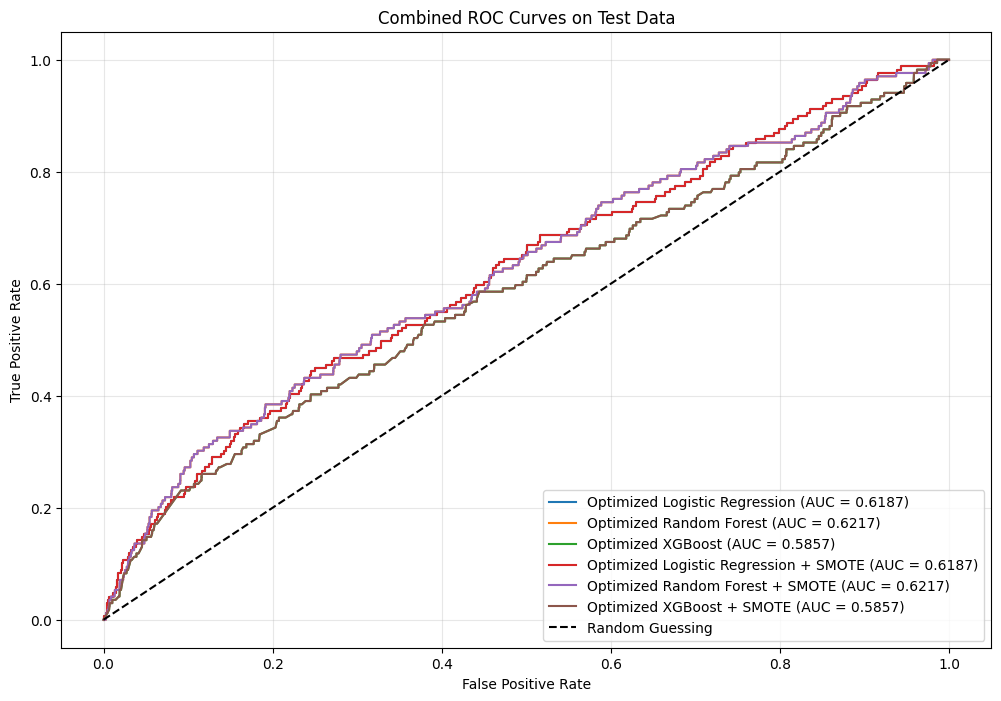

In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score

plt.figure(figsize=(12, 8))

# Plot ROC curve for Optimized Logistic Regression (No SMOTE)
plt.plot(fpr_test_lr_optimized, tpr_test_lr_optimized, label=f'Optimized Logistic Regression (AUC = {roc_auc_test_lr_optimized:.4f})')

# Plot ROC curve for Optimized Random Forest (No SMOTE)
plt.plot(fpr_test_rf_optimized, tpr_test_rf_optimized, label=f'Optimized Random Forest (AUC = {roc_auc_test_rf_optimized:.4f})')

# Plot ROC curve for Optimized XGBoost (No SMOTE)
plt.plot(fpr_test_xgb_optimized, tpr_test_xgb_optimized, label=f'Optimized XGBoost (AUC = {roc_auc_test_xgb_optimized:.4f})')

# Plot ROC curve for Optimized Logistic Regression (with SMOTE)
plt.plot(fpr_test_smote_lr, tpr_test_smote_lr, label=f'Optimized Logistic Regression + SMOTE (AUC = {roc_auc_test_smote_lr:.4f})')

# Plot ROC curve for Optimized Random Forest (with SMOTE)
plt.plot(fpr_test_smote_rf, tpr_test_smote_rf, label=f'Optimized Random Forest + SMOTE (AUC = {roc_auc_test_smote_rf:.4f})')

# Plot ROC curve for Optimized XGBoost (with SMOTE)
plt.plot(fpr_test_smote_xgb, tpr_test_smote_xgb, label=f'Optimized XGBoost + SMOTE (AUC = {roc_auc_test_smote_xgb:.4f})')

# Plot the diagonal line representing random guessing
plt.plot([0, 1], [0, 1], 'k--', label='Random Guessing')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Combined ROC Curves on Test Data')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

The top models for the test data are:
1. Optimized Logistic Regression with SMOTE and without
2. Optimized Random Forest with SMOTE and without
3. Optimized XGBoost with SMOTE and without

##**Global & Local Explainability**







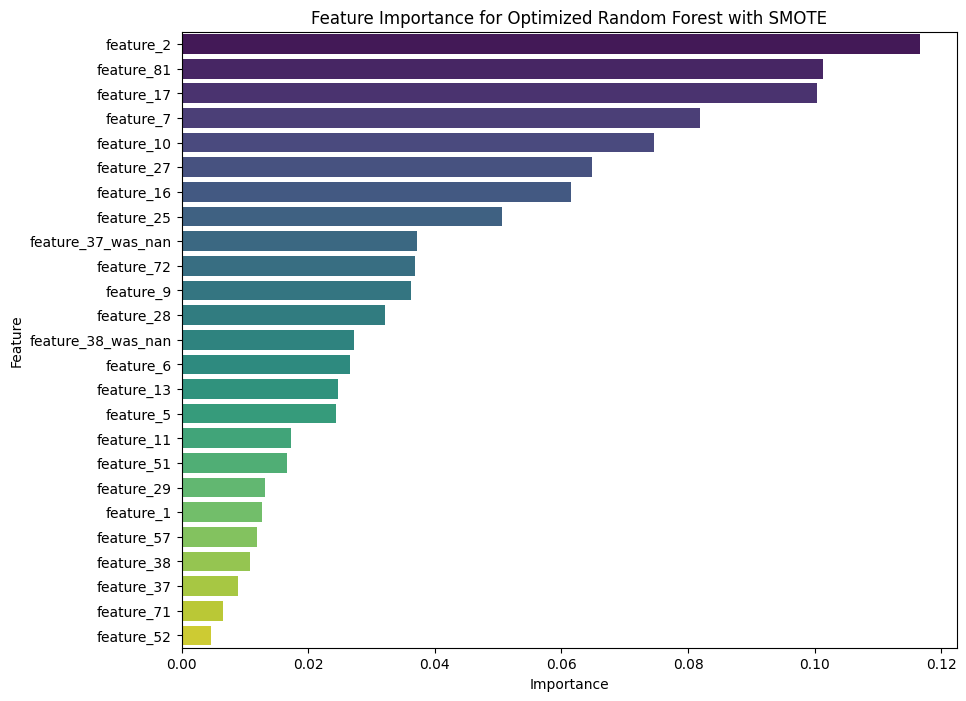

In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Access the feature_importances_ attribute
feature_importances_smote_rf = best_rf_model_smote.feature_importances_

# 2. Create a Pandas DataFrame to store feature names and their importance scores
feature_importance_df_smote_rf = pd.DataFrame({
    'Feature': X_train_reduced.columns,
    'Importance': feature_importances_smote_rf
})

# 3. Sort the DataFrame by feature importance in descending order
feature_importance_df_smote_rf = feature_importance_df_smote_rf.sort_values(by='Importance', ascending=False)

# 4. Create a horizontal bar plot to visualize the sorted feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance_df_smote_rf, palette='viridis', hue='Feature', legend=False)
plt.title('Feature Importance for Optimized Random Forest with SMOTE')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

This feature importance from the optimized Random Forest model indicates that feature 2, 81, 27, 17, 7, 10, 16 and 15 have a strong influence on the label on the response variable.

In [72]:
!pip install shap


Calculating SHAP values for XGBoost...


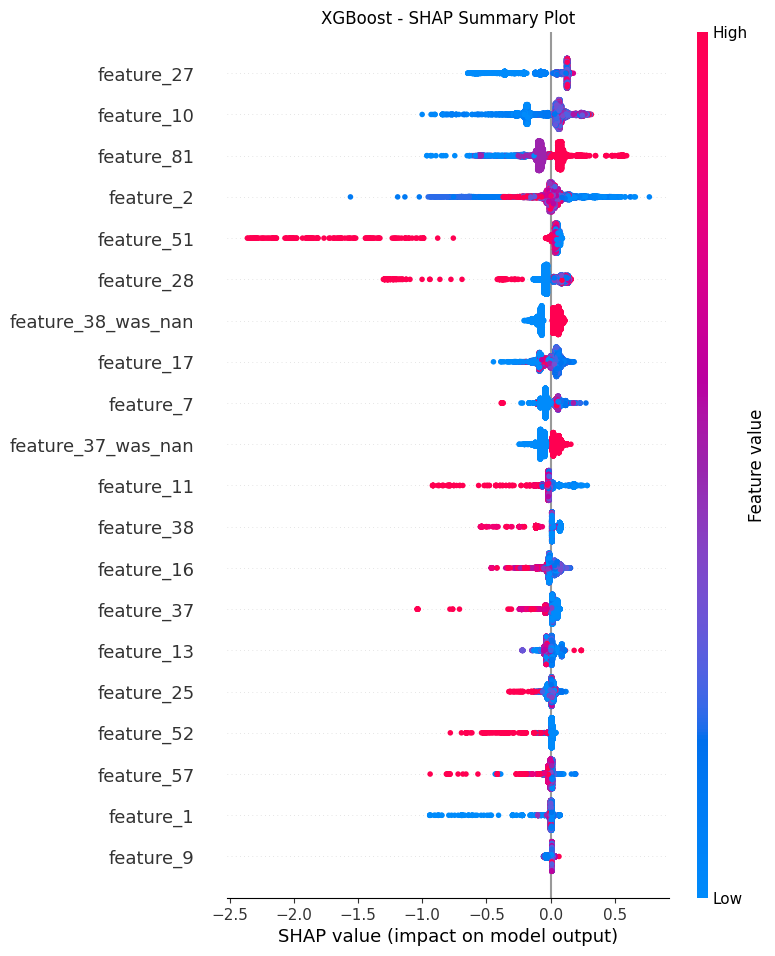

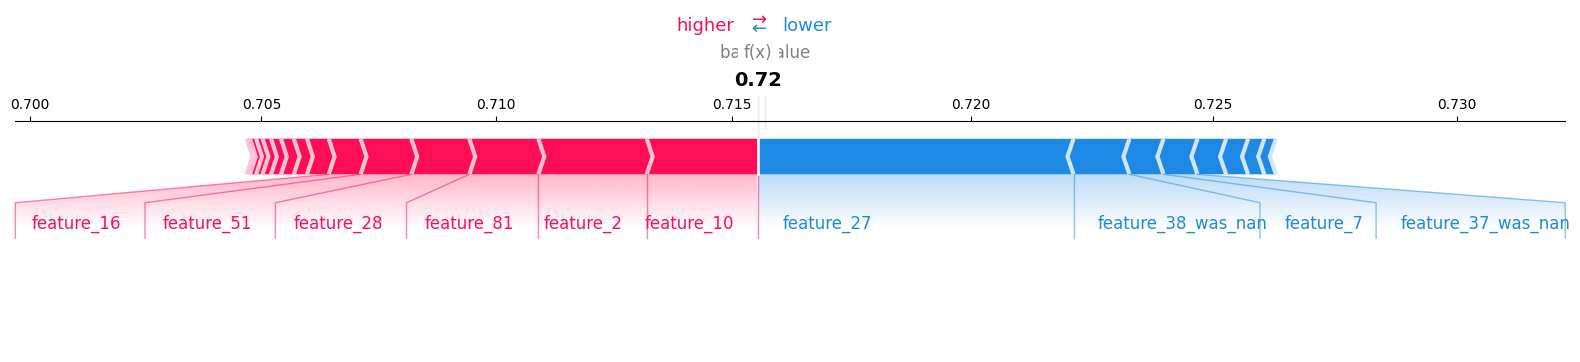


Calculating SHAP values for Random Forest...


 99%|===================| 11575/11696 [01:01<00:00]       

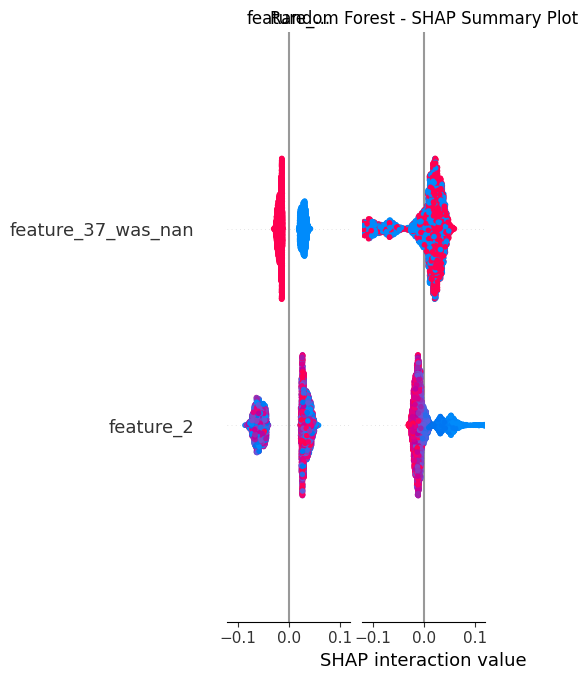

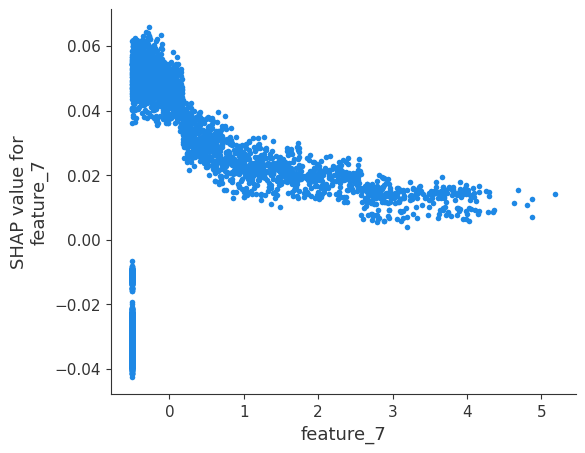

In [80]:
import shap
import matplotlib.pyplot as plt
import numpy as np

# SHAP for XGBoost
print("\nCalculating SHAP values for XGBoost...")
explainer_xgb = shap.Explainer(best_xgb_model, X_train_reduced)
shap_values_xgb = explainer_xgb(X_test_reduced)

# Summary plot (global feature importance)
shap.summary_plot(shap_values_xgb, X_test_reduced, show=False)
plt.title("XGBoost - SHAP Summary Plot")
plt.show()

# Force SHAP to show probabilities (0 to 1) instead of log-odds
explainer_xgb = shap.TreeExplainer(best_xgb_model, model_output="probability", data=background_sample)
shap_values_xgb = explainer_xgb(X_test_reduced)

shap.force_plot(explainer_xgb.expected_value, shap_values_xgb[0].values, X_test_reduced.iloc[0])

import copy
clean_shap_values = copy.deepcopy(shap_values_xgb[0])

# 2. Set the data attribute to None or empty strings
clean_shap_values.data = ["" for _ in clean_shap_values.data]

# 3. Plot using the "cleaned" object
shap.force_plot(
    explainer_xgb.expected_value,
    clean_shap_values.values,
    feature_names=X_test_reduced.columns, # Pass names manually
    matplotlib=True,
    link='logit' # Ensures 0-1 probability scale
)


# SHAP for Random Forest

print("\nCalculating SHAP values for Random Forest...")
explainer_rf = shap.Explainer(best_rf_model, X_train_reduced)
shap_values_rf = explainer_rf(X_test_reduced)

# Summary plot
shap.summary_plot(shap_values_rf, X_test_reduced, show=False)
plt.title("Random Forest - SHAP Summary Plot")
plt.show()

# Dependence plot for top feature

num_features = X_train_reduced.shape[1]

# Check if shap_values_rf.values is 3D (n_samples, n_features, n_outputs)
# For binary classification, often the values are given for each class
if len(shap_values_rf.values.shape) == 3:
    # Assuming index 1 corresponds to the positive class (target=1)
    shap_values_for_argmax = np.abs(shap_values_rf.values[:, :num_features, 1])
    shap_values_for_plot = shap_values_rf.values[:, :, 1] # Use values for class 1 for the plot
else:
    # If it's already 2D (n_samples, n_features)
    shap_values_for_argmax = np.abs(shap_values_rf.values[:, :num_features])
    shap_values_for_plot = shap_values_rf.values

mean_abs_shap_per_feature = shap_values_for_argmax.mean(axis=0)
idx_of_top_feature_in_shap = np.argmax(mean_abs_shap_per_feature)

# Get the feature name using this index from X_train_reduced's columns
top_feature_name = X_train_reduced.columns[idx_of_top_feature_in_shap]

# Find the corresponding integer index of this feature name in X_test_reduced's columns
aligned_feature_index_for_X_test_reduced = X_test_reduced.columns.get_loc(top_feature_name)

# Pass this aligned index, the selected SHAP values for plot, and the original X_test_reduced DataFrame
shap.dependence_plot(aligned_feature_index_for_X_test_reduced, shap_values_for_plot, X_test_reduced, interaction_index=None)
plt.show() # Ensure the dependence plot is displayed

The Shapley values from the XGBoost indicate features 27, 10, 2, 81, feature 38 was nan, 7, 28, 51, and 16 have a strong influence on the class label for the response. The bar below tries to locally explain explain the first observation in the test dataset, using shapley values, why observation 1 (0 in python) had it's label. Feature 2 and 10 are primary drivers pushing the value higher, while features 27 and 38 was nan pushed the value down towards 0. Overall, the XGBoost model predicted observation 0 had a probability of 0.72, which would be classified as 1.

The shap value for random forest suggest that when feature 38 was missing, feature_38_was_nan is 1 (suggesting that value was imputed with 0), this pushes the prediction higher (the probability of 1 higher). Feature 2 brings the probability down closer to 0. For Feature 7, as values increase, this increases the probability that the model will predict a positive (1) class for the response.